<a href="https://colab.research.google.com/github/Zero697-bit/221230071-Pengantar-ML/blob/main/week-08/praktikum_3_visualisasi_data_%5Bbreast_cancer%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tahap 1: Import Library & Load Dataset

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset bawaan sklearn
from sklearn.datasets import load_breast_cancer

# 1. Load Data
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target # 0 = Malignant (Ganas), 1 = Benign (Jinak)

# Simpan nama target untuk label nanti
target_names = data.target_names

# Cek data sekilas
print("--- Info Dataset ---")
print(f"Jumlah Data: {df.shape[0]} baris")
print(f"Jumlah Fitur: {df.shape[1]-1} kolom")
print(f"Kelas Target: {target_names}")
df.head() # Menampilkan 5 baris pertama

--- Info Dataset ---
Jumlah Data: 569 baris
Jumlah Fitur: 30 kolom
Kelas Target: ['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


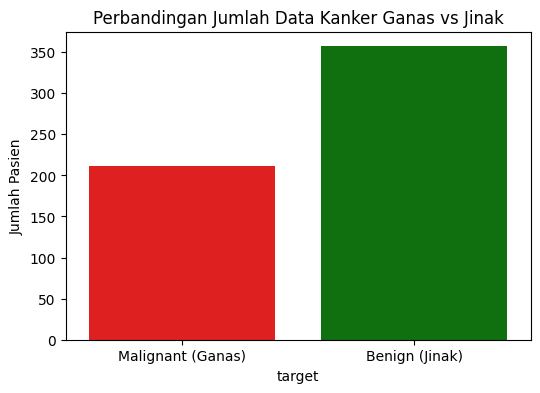

target
1    357
0    212
Name: count, dtype: int64


In [28]:
# Hitung jumlah setiap kelas
plt.figure(figsize=(6, 4))
sns.countplot(x=df['target'], hue=df['target'], palette=['red', 'green'], legend=False)
# -------------------------

plt.xticks([0, 1], ['Malignant (Ganas)', 'Benign (Jinak)'])
plt.title('Perbandingan Jumlah Data Kanker Ganas vs Jinak')
plt.ylabel('Jumlah Pasien')
plt.show()

# Tampilkan angka pastinya
print(df['target'].value_counts())

# Tahap 2: Preprocessing (Standardisasi Data)

In [29]:
from sklearn.preprocessing import StandardScaler

# Pisahkan Fitur (X) dan Target (y)
X = df.drop(columns=['target'])
y = df['target']

# Lakukan Scaling (Standardization)
# Mengubah data agar rata-rata=0 dan variansi=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data berhasil di-scaling. Siap untuk PCA.")

Data berhasil di-scaling. Siap untuk PCA.


# Tahap 3: Exploratory Data Analysis (PCA 3 Dimensi)

Varians per komponen: [0.44272026 0.18971182 0.09393163]
Total informasi yang tersimpan dalam 3D: 72.64%


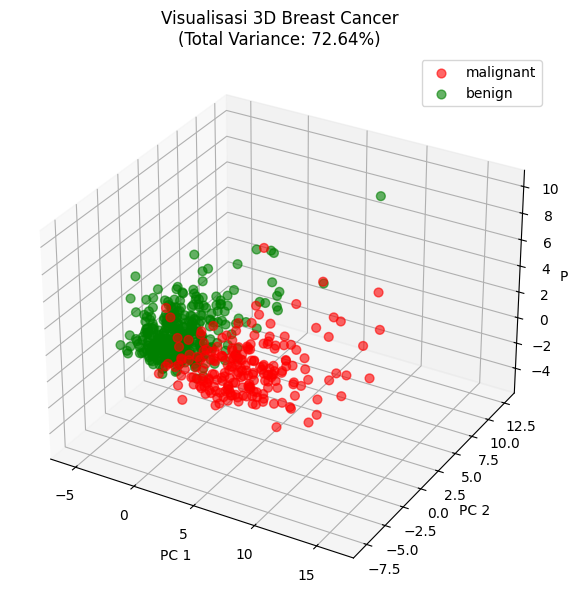

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns

# --- BAGIAN YANG HILANG (PREREQUISITES) ---
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#  Proses PCA (Membuat variabel X_pca)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled) # <--- INI VARIABEL YANG TADI HILANG
# ------------------------------------------

# --- BAGIAN VISUALISASI ANDA (Sekarang sudah aman) ---

# 1. Siapkan DataFrame
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Label'] = y.map({0: target_names[0], 1: target_names[1]})

# 2. Hitung Varians untuk Judul/Print
total_var = sum(pca.explained_variance_ratio_) * 100
print(f"Varians per komponen: {pca.explained_variance_ratio_}")
print(f"Total informasi yang tersimpan dalam 3D: {total_var:.2f}%")

# 3. Buat Plot 3D (Matplotlib)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Warna: Merah untuk Ganas (Malignant), Hijau untuk Jinak (Benign)
colors = {'malignant': 'red', 'benign': 'green'}

for label, color in colors.items():
    subset = pca_df[pca_df['Label'] == label]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'],
               c=color, label=label, s=40, alpha=0.6)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title(f'Visualisasi 3D Breast Cancer\n(Total Variance: {total_var:.2f}%)')
ax.legend()
plt.show()

In [37]:
import plotly.express as px
from sklearn.decomposition import PCA

# 1. Hitung Varians (Informasi yang disimpan)
total_var = sum(pca.explained_variance_ratio_) * 100
print(f"Varians per komponen: {pca.explained_variance_ratio_}")
print(f"Total informasi yang tersimpan dalam 3D: {total_var:.2f}%")

# 2. Siapkan DataFrame
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Label'] = y.map({0: target_names[0], 1: target_names[1]})

# 3. Buat Plot 3D Interaktif
fig = px.scatter_3d(
    pca_df,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Label',
    color_discrete_map={'malignant': 'red', 'benign': 'green'},
    title=f"Visualisasi 3D Interaktif (Total Info: {total_var:.2f}%)",
    opacity=0.7,
    labels={'PC1': 'PC 1 (Varians Terbesar)', 'PC2': 'PC 2', 'PC3': 'PC 3'}
)

# Perkecil ukuran titik agar rapi
fig.update_traces(marker=dict(size=4))

# Tampilkan
fig.show()

Varians per komponen: [0.44272026 0.18971182 0.09393163]
Total informasi yang tersimpan dalam 3D: 72.64%


# Tahap 4: Training Machine Learning (Random Forest)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 1. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Inisialisasi Model Random Forest
# n_estimators=100 artinya kita menggunakan 100 pohon keputusan
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 3. Training
rf_model.fit(X_train, y_train)

# 4. Prediksi Data Test
y_pred = rf_model.predict(X_test)

print("Model telah selesai dilatih dan melakukan prediksi.")

Model telah selesai dilatih dan melakukan prediksi.


# Tahap 5: Evaluasi & Analisis Hasil

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# A. Akurasi & Laporan Teks
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {acc:.2%}")
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=target_names))

Akurasi Model: 96.49%

--- Classification Report ---
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



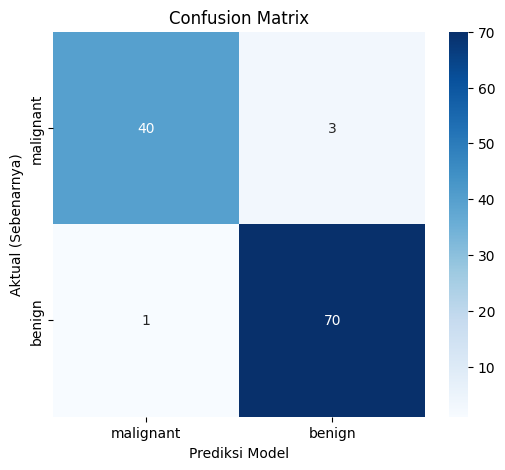

In [ ]:
# B. Confusion Matrix (Visualisasi Salah/Benar)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi Model')
plt.ylabel('Aktual (Sebenarnya)')
plt.show()

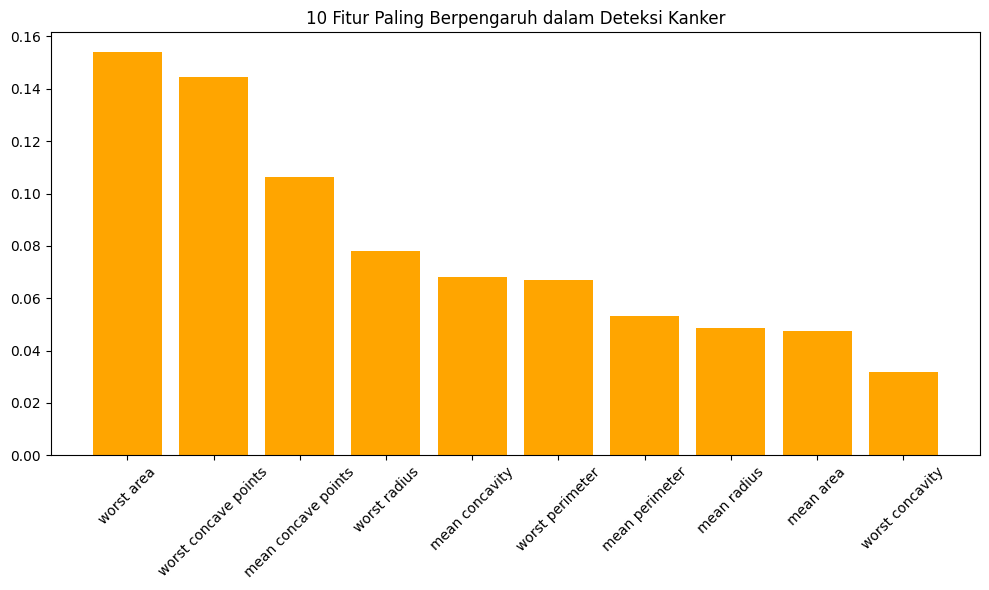

In [ ]:
# C. Feature Importance (Fitur Penentu)
# Melihat fitur apa yang paling dianggap penting oleh model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1][:10] # Ambil top 10

plt.figure(figsize=(10, 6))
plt.title("10 Fitur Paling Berpengaruh dalam Deteksi Kanker")
plt.bar(range(10), importances[indices], align="center", color='orange')
plt.xticks(range(10), X.columns[indices], rotation=45)
plt.tight_layout()
plt.show()